In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ratings_for_upload.csv")

C:\Users\Hannah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,9,15,16,17,18,19,20,21,22,23,24,26,27,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,rating_agency_name,file_creating_date,sec_category,issuer_name,legal_entity_identifier,object_type_rated,instrument_name,cusip_number,coupon_date,maturity_date,...,issuer_identifier_schema,instrument_identifier,instrument_identifier_schema,central_index_key,obligor_identifier,obligor_identifier_schema,obligor_identifier_other,obligor_sec_category,obligor_industry_group,obligor_name
0,"Kroll Bond Rating Agency, Inc.",2017-12-01,Financial,Air Lease Corporation,NaN,Instrument,Air Lease Corporation SR NT,00912XAF1,0.05625,2017-04-01,...,NRSRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Kroll Bond Rating Agency, Inc.",2017-12-01,Financial,Air Lease Corporation,NaN,Instrument,Air Lease Corporation SR NT,00912XAF1,0.05625,2017-04-01,...,NRSRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Kroll Bond Rating Agency, Inc.",2017-12-01,Financial,Air Lease Corporation,NaN,Instrument,Air Lease Corporation SR NT,00912XAF1,0.05625,2017-04-01,...,NRSRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Kroll Bond Rating Agency, Inc.",2017-12-01,Financial,Air Lease Corporation,NaN,Instrument,Air Lease Corporation SR NT,00912XAG9,0.04500,2016-01-15,...,NRSRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Kroll Bond Rating Agency, Inc.",2017-12-01,Financial,Air Lease Corporation,NaN,Instrument,Air Lease Corporation SR NT,00912XAG9,0.04500,2016-01-15,...,NRSRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
print(len(df), 'observations')
print(df['rating_agency_name'].nunique(), 'unique rating agencies')
print('\nRating agencies: ', df['rating_agency_name'].unique())
print('\nColumns: ', df.columns)

8442455 observations
10 unique rating agencies
Rating agencies:  ['Kroll Bond Rating Agency, Inc.' "Moody's Investors Service" 'DBRS'
 'Japan Credit Rating Agency,Ltd.' 'Egan-Jones Ratings Company'
 'Fitch Ratings' 'A.M.BEST COMPANY' 'HR Ratings de Mexico S.A. de C.V.'
 "Standard & Poor's Ratings Services" 'Morningstar Credit Ratings, LLC.']
Columns:  Index(['rating_agency_name', 'file_creating_date', 'sec_category',
       'issuer_name', 'legal_entity_identifier', 'object_type_rated',
       'instrument_name', 'cusip_number', 'coupon_date', 'maturity_date',
       'par_value', 'issued_paid', 'rating', 'rating_action_date',
       'rating_action_class', 'rating_type', 'rating_sub_type',
       'rating_type_term', 'other_announcement_type', 'watch_status',
       'rating_outlook', 'issuer_identifier', 'issuer_identifier_schema',
       'instrument_identifier', 'instrument_identifier_schema',
       'central_index_key', 'obligor_identifier', 'obligor_identifier_schema',
       'obligor_i

CUSIP is a nine-digit numeric or nine-character alphanumeric code that identifies a North American financial security for the purposes of facilitating clearing and settlement of trades')

In [19]:
# Convert date columns to datetime objects
df['file_creating_date'] = pd.to_datetime(df['file_creating_date'])
df['rating_action_date'] = pd.to_datetime(df['rating_action_date'])

In [20]:
print('earliest date: ', df['rating_action_date'].min())
print('latest date: ', df['rating_action_date'].max())

earliest date:  1976-04-01 00:00:00
latest date:  2017-12-01 00:00:00


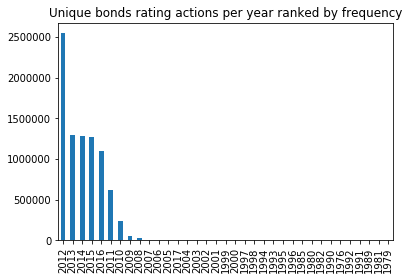

In [27]:
# Create column with rating_action year
df['rating_action_year'] = df['rating_action_date'].dt.to_period('Y')
df['rating_action_year'].value_counts().plot(title = 'Unique bonds rating actions per year ranked by frequency', kind='bar')